In [1]:
import os
os.chdir('../') # insures use of models folder as python module 
# Any figures saved or data pickled in the current working 
# directly will be saved up one folder from here.
import pybamm
import models
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [2]:
model = models.Hua2019()

In [3]:
model.print_citations()

Hua, X., Zhang, T., Offer, G. J. & Marinescu, M. Towards online tracking of the shuttle effect in lithium sulfur batteries using differential thermal voltammetry. J. Energy Storage 21, 765–772 (2019).


In [3]:
'''
Without the specific initial conditions given, we leave the cell at
3.4 Ah theoretical capacity. This will change results slightly,
but we will perform the charge expirment using the same C-rate
'''


multicycle = ['Discharge at 1.7 A until 2.215 V',
                'Charge at .34 A for 10 hours']

experiment = pybamm.Experiment(multicycle)


sim = pybamm.Simulation(
    model=model,
    experiment = experiment,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-12,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)

In [4]:
sim.solve()

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

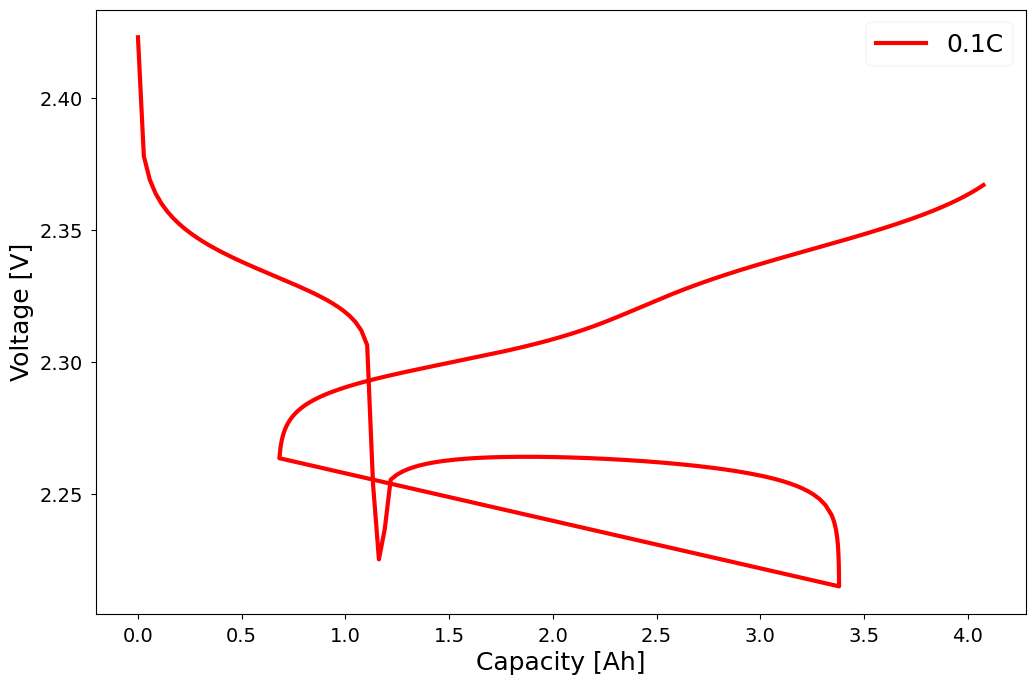

In [5]:
capacity = sim.solution['Capacity [Ah]'].entries
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

plt.legend(["0.1C",])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

Notice that capacity resets because in the model it is defined simply as current multiplied by time. When current changes, so too does the capacity. We have two ways to clean this up. 

### Multicycle plots

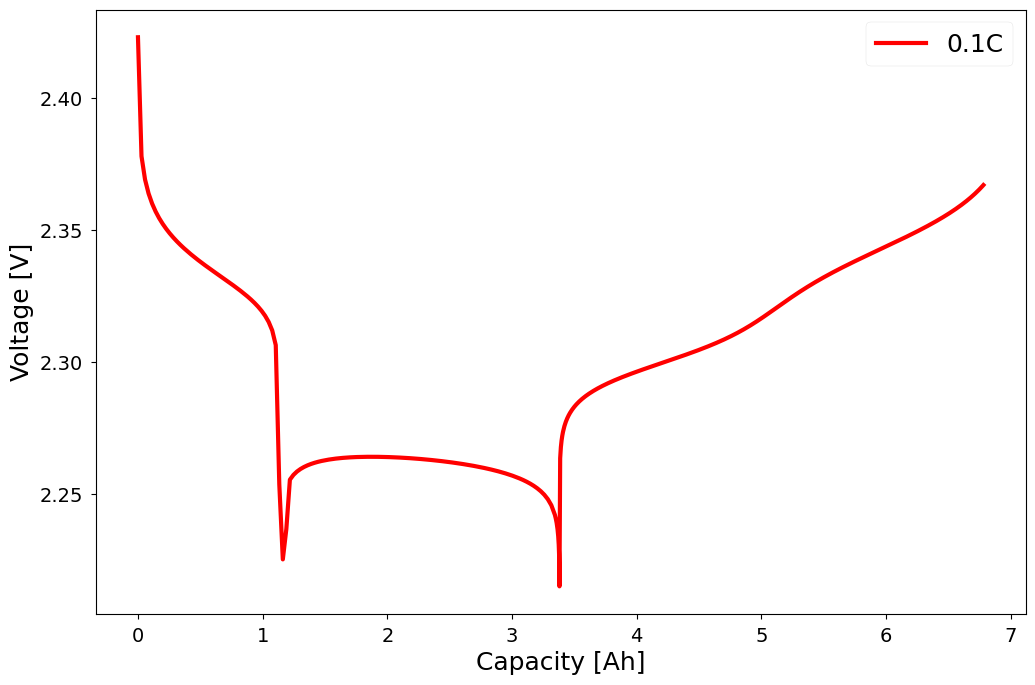

In [6]:
# Truncated Reimann sum approximation to capacity = \int_0^t I dt 
# (this should be nearly exact due to constant current)
dt = np.concatenate([[0], np.diff(sim.solution.t)])
capacity = np.cumsum(abs(sim.solution['Current [A]'].entries) * dt)/3600

V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

plt.legend(["0.1C",])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

### Specific cycle plots

In [7]:
charge = sim.solution.cycles[1]

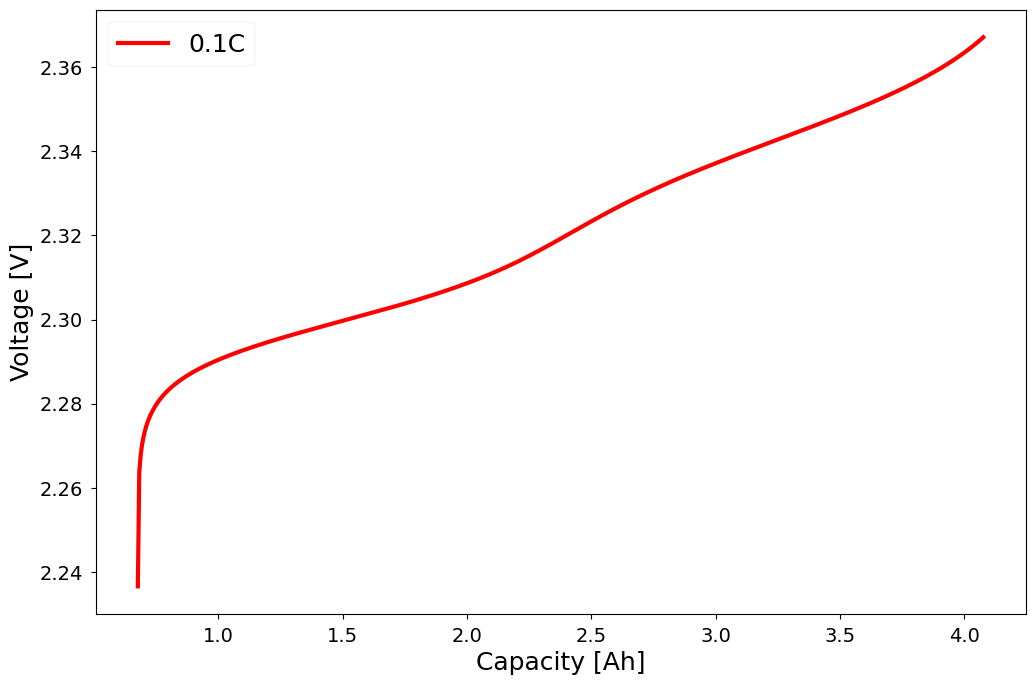

In [8]:
capacity = charge['Capacity [Ah]'].entries
V = charge["Terminal voltage [V]"].entries
plt.plot(capacity, V)

plt.legend(["0.1C",])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

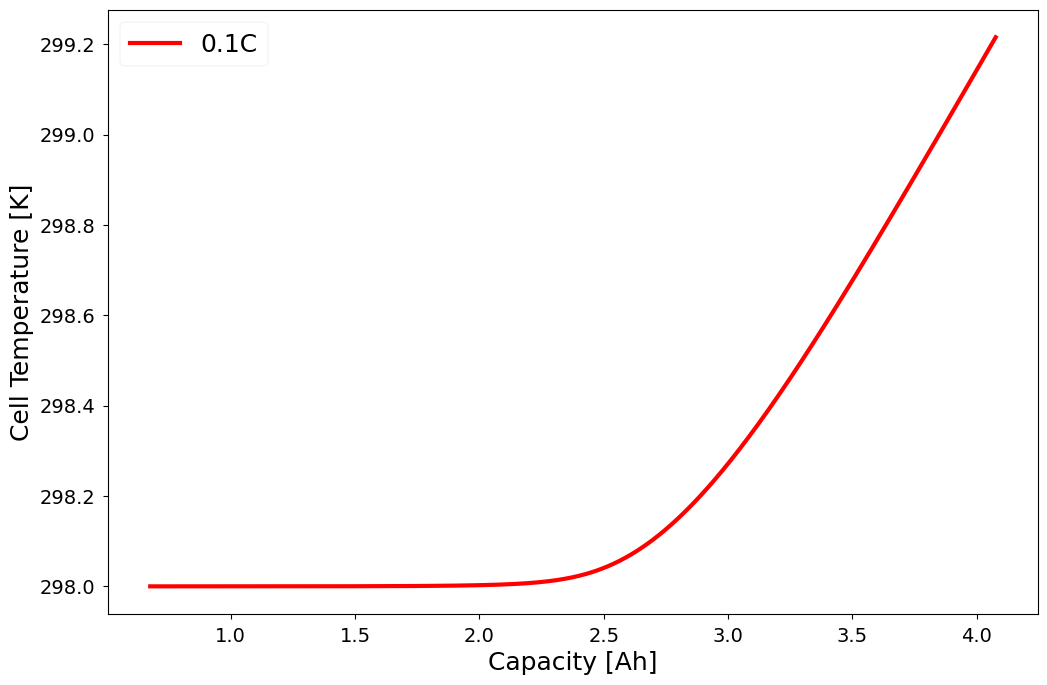

In [9]:
capacity = charge['Capacity [Ah]'].entries
Tc = charge["Cell Temperature [K]"].entries
plt.plot(capacity, Tc)

plt.legend(["0.1C",])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Cell Temperature [K]');